# Random walks
Here we visualise and study random walks with and without memory. 

First we plot simple random walks in 1D (steps sizes are constant), then we make random walks with drift, then finally we come to continuous time random walks, where steps sizes are given by some distribution.

[[-1]
 [ 1]
 [ 1]
 ..., 
 [ 1]
 [-1]
 [-1]]


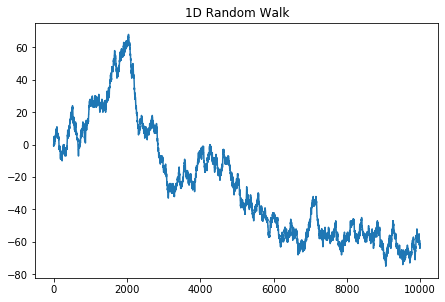

In [9]:
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
#colors = cycle(‘bgrcmykbgrcmykbgrcmykbgrcmyk’)
import networkx as nx
import numpy as np
'''
Now let us visualise random walk in 1D
'''
# Define parameters for the walk
dims = 1
step_n = 10000
step_set = [-1, 0, 1]
size = 10 
sizefig = 10

origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# print(steps)
# Plot the random walk path

#fig =  plt.figure(figsize = (8, 8))#plt.figure(figsize=(sizefig,sizefig))
#fig = plt.figure(figsize=(8,4),dpi=200)
#ax = plt.subplot(332)#fig.add_subplot(111)

#ax.scatter(np.arange(step_n+1), path, c=’blue’,alpha=0.25,s=0.05);
plt.plot(path)#,c=’blue’,alpha=0.5,lw=0.5,ls=’ — ‘,);
plt.plot(0, start)#,c=’red’, marker=’+’)
plt.plot(step_n, stop)#, c=’black’, marker=’o’)
plt.title('1D Random Walk')
plt.tight_layout(pad=0)
#plt.savefig('plots/random_walk_1d.png',dpi=250);


### Random walk with memory 
Random walk without memory (or Markovian random walk) is the simplest example of random process. 
We can also construct random walk with memory, where property of the next step depends on the previous steps.

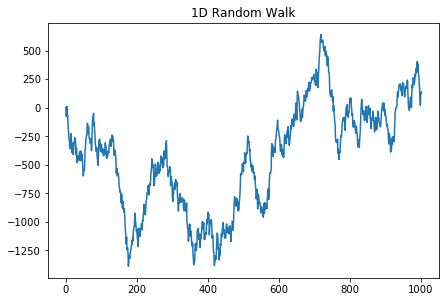

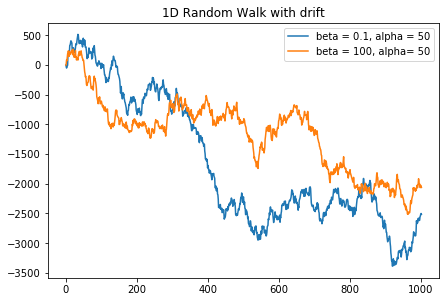

In [36]:
'''
Now let us visualise random walk 
with the memory at each step

'''
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
import random

x = [0]
step_n = 1000
alpha = 50

# we make the step of random walk 
for j in range(step_n):
    step_x = random.randint(0,1)
    if step_x == 1:
        x.append(x[j] + 1 + alpha *np.random.normal())
    else:
        x.append(x[j] - 1 + alpha *np.random.normal())
        
y = [alpha*np.random.normal() for j in range(len(x))]
        
# print(y) 
origin = [0]
steps = y
path = np.concatenate([origin, steps]).cumsum(0)
    
# plotting 
plt.plot(path)#,c=’blue’,alpha=0.5,lw=0.5,ls=’ — ‘,);
plt.plot(0, start)#,c=’red’, marker=’+’)
plt.plot(step_n, stop)#, c=’black’, marker=’o’)
plt.title('1D Random Walk')
plt.tight_layout(pad=0)
plt.show()


'''
# we can add the memory effect to each step making it distributed from skewed sample into direction of randint
# x(t) = x(t-1) + alpha(t-1), where alpha(t-1) depends on the previous position of random walk
'''


x = [0]
step_n = 1000
alpha = 100
beta = 10 


def rand_walk(alpha, beta):
    # random walk 
    # generates an array with parameters beta and alpha
    
    x = [0] #initial position 
    for j in range(step_n):
        step_x = random.randint(0,1)
        if step_x == 1:
            x.append(x[j] + 1*x[j-1] + beta*x[j-1] *np.random.normal()) #type of memory term
        else:
            x.append(x[j] - 1*x[j-1] + beta*x[j-1] *np.random.normal())
        
    y = [alpha*np.random.normal() for j in range(len(x))]
    return y
        
y1 = rand_walk(50, 0.1) #almost normal random walk without drift
y2 = rand_walk(50, 100) #random walk with drift


# cumulative distribution of random walks
steps1 = y1
path1 = np.concatenate([origin, steps1]).cumsum(0)
steps2 = y2
path2 = np.concatenate([origin, steps2]).cumsum(0)


# plotting 
plt.plot(path1)#,c=’blue’,alpha=0.5,lw=0.5,ls=’ — ‘,);
plt.plot(path2)#,c=’blue’,alpha=0.5,lw=0.5,ls=’ — ‘,);

plt.legend(["beta = 0.1, alpha = 50", "beta = 100, alpha= 50"])

plt.plot(0, start)#,c=’red’, marker=’+’)
plt.plot(step_n, stop)#, c=’black’, marker=’o’)
plt.title('1D Random Walk with drift')
plt.tight_layout(pad=0)



# plotly plotting
#trace1 = go.Scatter(
#    x=x,
#    y=y,
#    mode='markers',
#    name='Random Walk in 1D',
#    marker=dict(
#        color=[i for i in range(len(x))],
#        size=7,
#        colorscale=[[0, 'rgb(178,10,28)'], [0.50, 'rgb(245,160,105)'],
#                    [0.66, 'rgb(245,195,157)'], [1, 'rgb(220,220,220)']],
#        showscale=True,
#    )
#)
#layout = go.Layout(
#    yaxis=dict(
#        range=[-1, 1]
#    )
#)


#data = [trace1]
#fig= go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='random-walk-1d')


### Random walk in many dimensions

x2 rw [  3.52024416e+00   3.89350493e+00   4.26676569e+00 ...,   5.43203779e+03
   5.43203779e+03   5.43203779e+03]


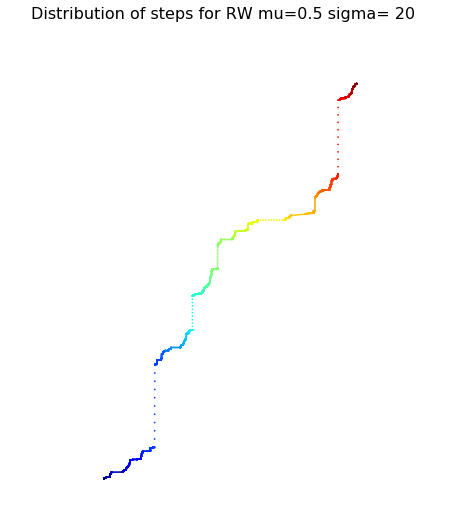

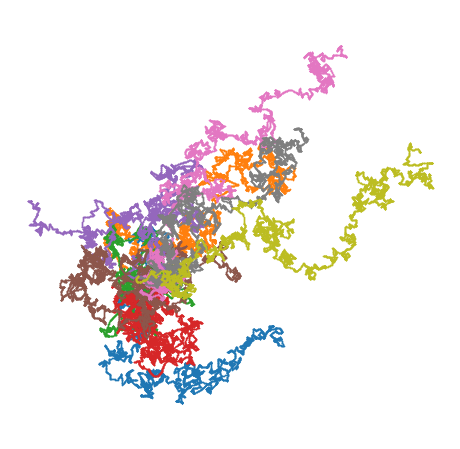

In [4]:
'''
Now let us visualize continuous time random walk 
in N-dimensional space, here we first take N=2, easier to visualize.
'''

import matplotlib.image as mpimg
import numpy as np
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


'''
Parameters setting

'''
n= 1000 #length of random walk
mu = 0.5 #normal distribution
sigma =20
beta = 5 #exponential parameters
a = 1 # pareto distribution
weib = 1 #weibul parameter

'''
Simple RW motion with random steps
'''

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n)) 

'''
Now we introduce some CTRW motion in between the steps
'''

x =  np.cumsum(np.random.exponential(1./beta, n))
y =  np.cumsum(np.random.exponential(1./beta, n))

x_w = np.cumsum(np.random.weibull(weib, n))
y_w = np.cumsum(np.random.weibull(weib, n))


x =  np.cumsum(np.random.pareto(a, n))
y =  np.cumsum(np.random.pareto(a, n))


x_n =  np.cumsum(np.random.normal(mu, sigma, n))
y_n =  np.cumsum(np.random.normal(mu, sigma, n))



# We add 10 intermediary points between two
# successive points. We interpolate x and y.


'''
plotting one RW
'''
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)
print('x2 rw', x2)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,) # We draw our points with a gradient of colors.
ax.axis('equal')
ax.set_axis_off()
#fig.suptitle('Distribution of steps for RW a='+str(a), fontsize=16)
fig.suptitle('Distribution of steps for RW mu='+str(mu)+' sigma= '+str(sigma), fontsize=16)
plt.savefig('RW_motion_steps_normal_mu'+str(mu)+'sigma'+str(mu)+'.png')

'''
plotting several RWs
'''


k = 10 #parameter of plotting
mu_i = 0.1 # parameter of random walk distribution
sigma_i = 0.1
n_rw=9 #number of RWs to plot

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for i_rw in range(0,n_rw):    
    x_n =  np.cumsum(np.random.normal(mu_i, sigma, n))
    y_n =  np.cumsum(np.random.normal(mu_i, sigma, n))
    mu_i = mu_i +0.1
    sigma_i = sigma_i + 0.1


    x2 = np.interp(np.arange(n * k), np.arange(n) * k, x_n)
    y2 = np.interp(np.arange(n * k), np.arange(n) * k, y_n)

#    color =  ['tab:blue', 'tab:orange', 'tab:green']:
        
    # Now, we draw our points with a gradient of colors.
    ax.scatter(x2, y2, linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)

# Now, we draw our points with a gradient of colors.
#ax.scatter(x3, y3, c=range(n * k), linewidths=0,           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

plt.show()


number of visited nodes
[1, 0, 1, 0, 1, 0, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3]


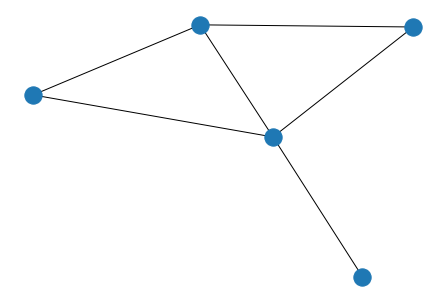

In [16]:


'''
Now let us consider random walk on a random network
'''
walkLength = 20


# let's generate a graph G
G = nx.gnp_random_graph(5, 0.5)
nx.draw(G)


# let networkx return the adjacency matrix A
A = nx.adj_matrix(G)
A = A.todense()
A = np.array(A, dtype = np.float64)
# let's evaluate the degree matrix D
D = np.diag(np.sum(A, axis=0))
# ...and the transition matrix T
T = np.dot(np.linalg.inv(D),A)



# define the starting node, say the 0-th
p = np.array([1, 0, 0, 0, 0]).reshape(-1,1)
visited = list()
for k in range(walkLength):
    # evaluate the next state vector
    p = np.dot(T,p)
    # choose the node with higher probability as the visited node
    visited.append(np.argmax(p))
    
    
print('number of visited nodes') 
print(visited)   
    
